In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/lucky one/4 th sem/EDI/Menstrual-survey_XG.csv")

In [ ]:
df.head()

,cramps,severity_cramps,therapies,duration,flow_of_menstrual_cycle,management_of_menstrual_cycle\n\n,mindset,mood,menstrual_product,area,weakness_during_periods,pain_in_abdomen_Idysmenorrheal,cycle_track,consulted,water_amount,feelings,depression_or_anxiety\n,societal_myths \n
0,5,4,7,6,2,1,3,4,2,1,1,1,2,2,1,5,4,2
1,4,4,6,5,2,1,3,3,3,3,3,2,2,2,2,2,3,4
2,2,2,6,5,2,1,2,3,3,1,3,3,1,2,1,2,2,2
3,2,3,5,4,2,1,2,4,3,1,1,2,3,1,1,5,3,2
4,3,3,6,6,2,2,1,5,3,1,1,1,2,2,3,4,1,1


In [ ]:
df.isnull()

,cramps,severity_cramps,therapies,duration,flow_of_menstrual_cycle,management_of_menstrual_cycle\n\n,mindset,mood,menstrual_product,area,weakness_during_periods,pain_in_abdomen_Idysmenorrheal,cycle_track,consulted,water_amount,feelings,depression_or_anxiety\n,societal_myths \n
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
301,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
302,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
303,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
304,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


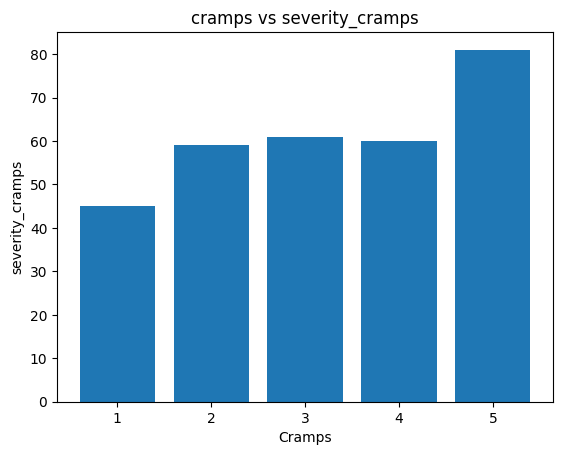

In [ ]:
#bar chart
cramp_counts = df['cramps'].value_counts()
plt.bar(cramp_counts.index, cramp_counts.values)
plt.title('cramps vs severity_cramps')
plt.xlabel('Cramps')
plt.ylabel('severity_cramps')
plt.show()


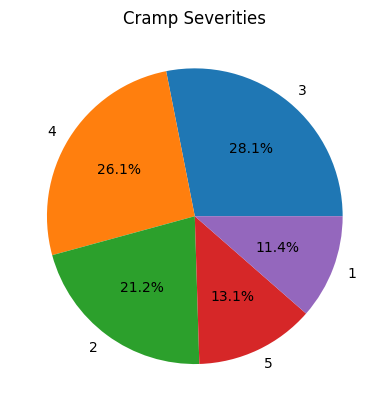

In [ ]:
# Pie chart of cramp severities
cramp_severities = df[' severity_cramps'].value_counts()
plt.pie(cramp_severities.values, labels=cramp_severities.index, autopct='%1.1f%%')
plt.title('Cramp Severities')
plt.show()

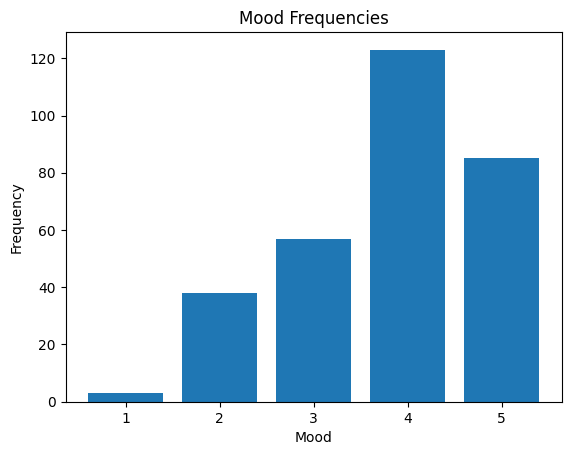

In [ ]:
# Bar chart of mood frequencies
mood_counts = df['mood'].value_counts()
plt.bar(mood_counts.index, mood_counts.values)
plt.title('Mood Frequencies')
plt.xlabel('Mood')
plt.ylabel('Frequency')
plt.show()

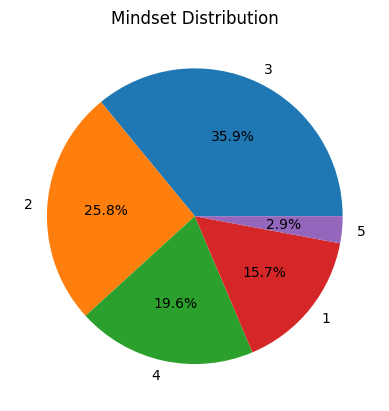

In [ ]:
# Pie chart of mindset distribution
mindset_counts = df['mindset '].value_counts()
plt.pie(mindset_counts.values, labels=mindset_counts.index, autopct='%1.1f%%')
plt.title('Mindset Distribution')
plt.show()

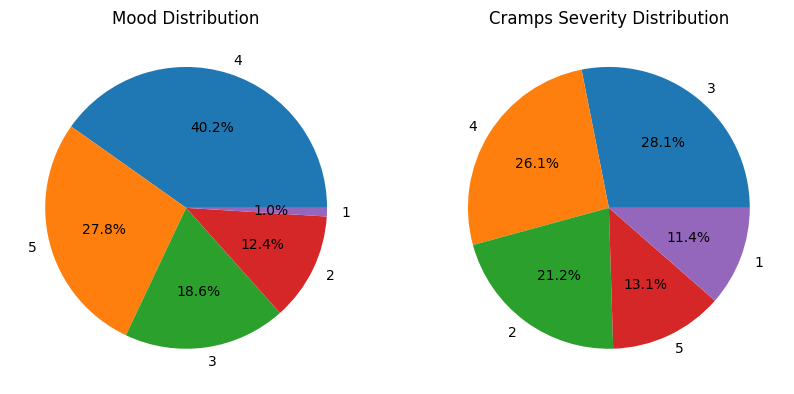

In [ ]:
mood_counts = df['mood'].value_counts()
cramps_counts = df[' severity_cramps'].value_counts()

# Plot the pie chart
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
ax1.pie(mood_counts.values, labels=mood_counts.index, autopct='%1.1f%%')
ax1.set_title('Mood Distribution')
ax2.pie(cramps_counts.values, labels=cramps_counts.index, autopct='%1.1f%%')
ax2.set_title('Cramps Severity Distribution')
plt.show()

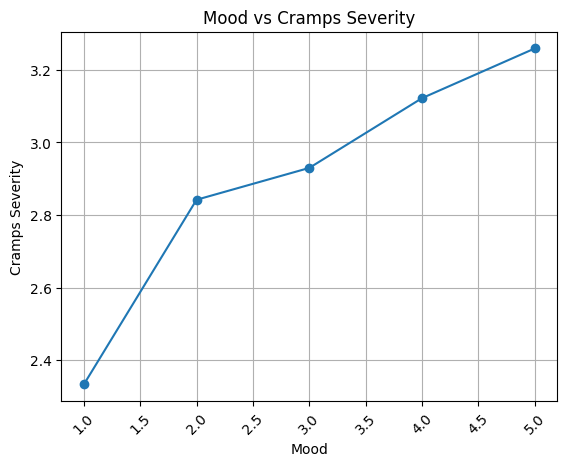

In [ ]:
mood_cramps = df.groupby('mood')[' severity_cramps'].mean().reset_index()

# Sort the data by mood in ascending order
mood_cramps = mood_cramps.sort_values('mood')

# Plot the line chart
plt.plot(mood_cramps['mood'], mood_cramps[' severity_cramps'], marker='o')
plt.title('Mood vs Cramps Severity')
plt.xlabel('Mood')
plt.ylabel('Cramps Severity')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

cramps, severity_cramps, mindset, mood

In [ ]:
random.seed(123)

import numpy as np
import random
from collections import deque
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

class DQNAgent:
    def __init__(self, state_size, action_size):
        self.state_size = state_size
        self.action_size = action_size
        self.memory = deque(maxlen=2000)
        self.gamma = 0.95
        self.epsilon = 1.0
        self.epsilon_min = 0.01
        self.epsilon_decay = 0.995
        self.learning_rate = 0.001
        self.model = self._build_model()

    def _build_model(self):
        model = Sequential()
        model.add(Dense(24, input_dim=self.state_size, activation='relu'))
        model.add(Dense(24, activation='relu'))
        model.add(Dense(self.action_size, activation='linear'))
        model.compile(loss='mse', optimizer=Adam(lr=self.learning_rate))
        return model

    def remember(self, state, action, reward, next_state, done):
        self.memory.append((state, action, reward, next_state, done))

    def act(self, state):
        if np.random.rand() <= self.epsilon:
            return random.randrange(self.action_size)
        act_values = self.model.predict(state)
        return np.argmax(act_values[0])

    def replay(self, batch_size):
        minibatch = random.sample(self.memory, batch_size)
        for state, action, reward, next_state, done in minibatch:
            target = reward
            if not done:
                target = (reward + self.gamma *
                          np.amax(self.model.predict(next_state)[0]))
            target_f = self.model.predict(state)
            target_f[0][action] = target
            self.model.fit(state, target_f, epochs=1, verbose=0)
        if self.epsilon > self.epsilon_min:
            self.epsilon *= self.epsilon_decay

    def load(self, name):
        self.model.load_weights(name)

    def save(self, name):
        self.model.save_weights(name)

def main():
    state_size = 4
    action_size = 3
    agent = DQNAgent(state_size, action_size)
    done = False
    batch_size = 32
    for e in range(1):
        state = np.zeros((1, state_size))
        state[0, 0] = input("Cramps (0-5): ")
        state[0, 1] = input("Severity of cramps (1-3): ")
        state[0, 2] = input("Mindset (1-5): ")
        state[0, 3] = input("Mood (1-5): ")
        for time in range(1):
            action = agent.act(state)
            if action == 0:
                print("Stretching can help relieve cramps. \n Try some simple stretches like calf and hamstring stretches.")
            elif action == 1:
                print("Medications like ibuprofen can help reduce cramps. \n Consult with your doctor before taking any medication.")
            else:
                print("Resting and applying heat can help with cramps. \n Take a break and try using a heating pad.")
            reward = input("Did this suggestion help? (0/1): ")
            reward = int(reward)
            next_state = state
            done = True if time == 99 else False
            agent.remember(state, action, reward, next_state, done)
            state = next_state
            if done:
                print("episode:{}/{}, score: {}".format(e, 1000, time))
                break
        if len(agent.memory) > batch_size:
            agent.replay(batch_size)

    agent.save("dqn_model.h5")

if __name__ == "__main__":
    main()

Cramps (0-5): 5
Severity of cramps (1-3): 3
Mindset (1-5): 3
Mood (1-5): 2
Medications like ibuprofen can help reduce cramps. 
 Consult with your doctor before taking any medication.
Did this suggestion help? (0/1): 1


mindset, socialMyth, depression

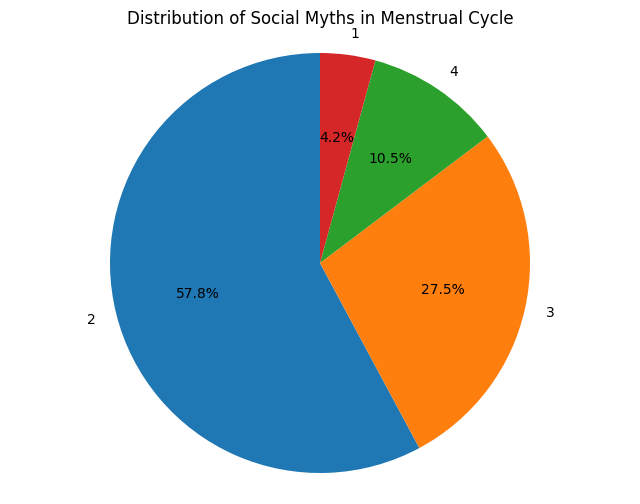

In [ ]:
social_myth = df["societal_myths \n"]
depression = df['depression_or_anxiety\n']

myth_count = df['societal_myths \n'].value_counts()
labels = myth_count.index
sizes = myth_count.values

plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Social Myths in Menstrual Cycle')
plt.axis('equal')
plt.show()

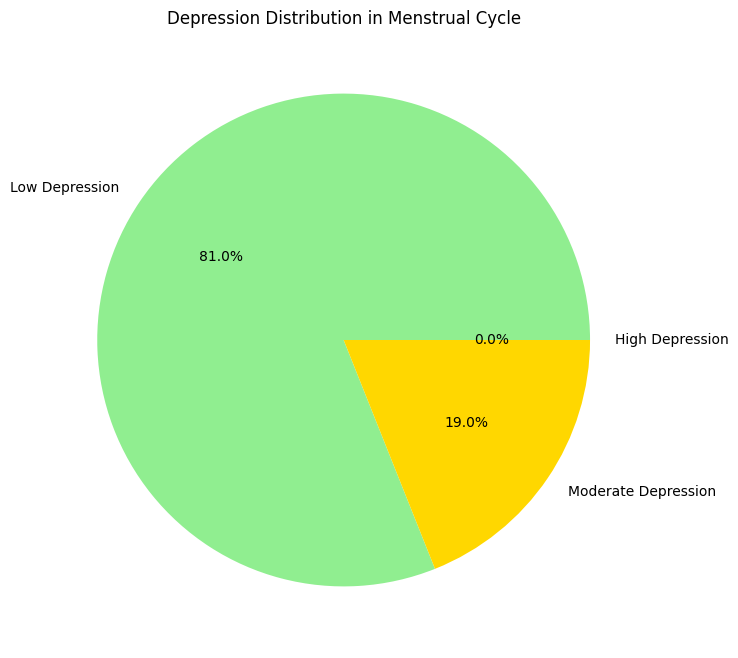

In [ ]:
social_myth = df["societal_myths \n"]
depression = df['depression_or_anxiety\n']

plt.figure(figsize=(8, 8))
labels = ['Low Depression', 'Moderate Depression', 'High Depression']
colors = ['lightgreen', 'gold', 'coral']
depression_bins = pd.cut(depression, bins=[0, 3, 6, 10], labels=labels)
depression_distribution = depression_bins.value_counts()
plt.pie(depression_distribution, labels=depression_distribution.index, colors=colors, autopct='%1.1f%%')
plt.title('Depression Distribution in Menstrual Cycle')
plt.show()

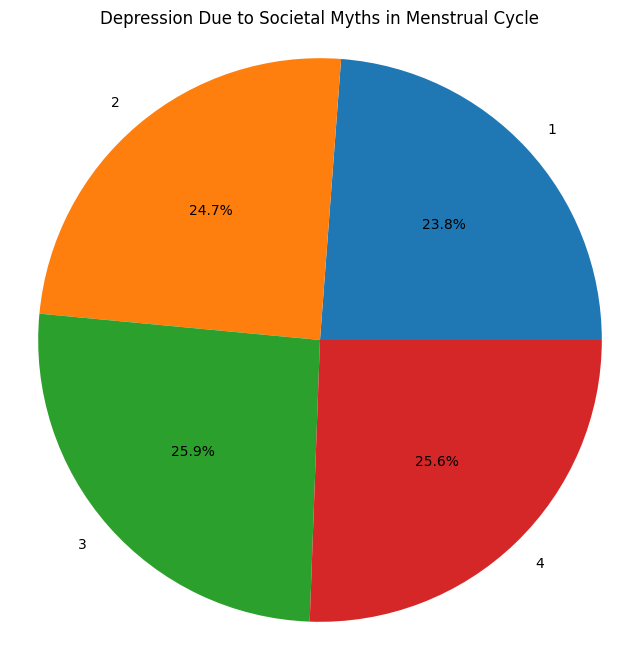

In [ ]:
mean_depression = df.groupby('societal_myths \n')['depression_or_anxiety\n'].mean()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(mean_depression, labels=mean_depression.index, autopct='%1.1f%%')
plt.title('Depression Due to Societal Myths in Menstrual Cycle')
plt.axis('equal')
plt.show()

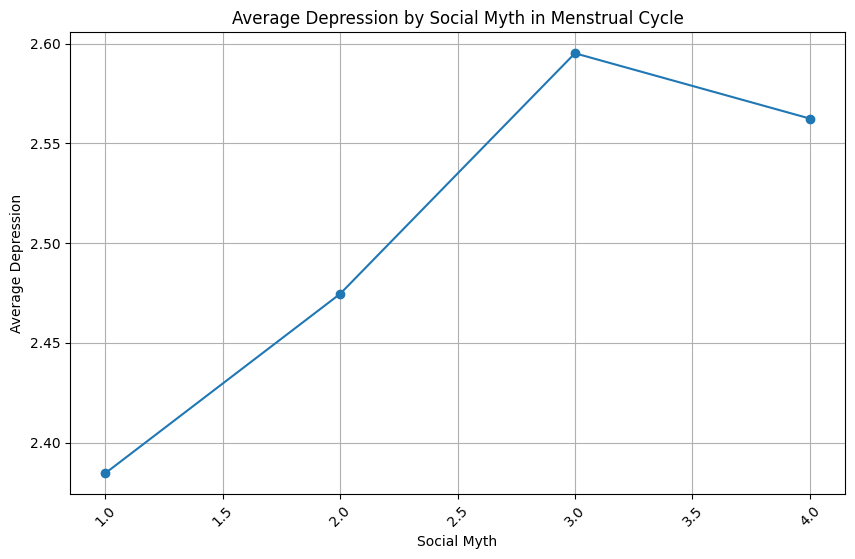

In [ ]:
average_depression = df.groupby('societal_myths \n')['depression_or_anxiety\n'].mean()

# Create a line plot
plt.figure(figsize=(10, 6))
average_depression.plot(marker='o')
plt.title('Average Depression by Social Myth in Menstrual Cycle')
plt.xlabel('Social Myth')
plt.ylabel('Average Depression')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

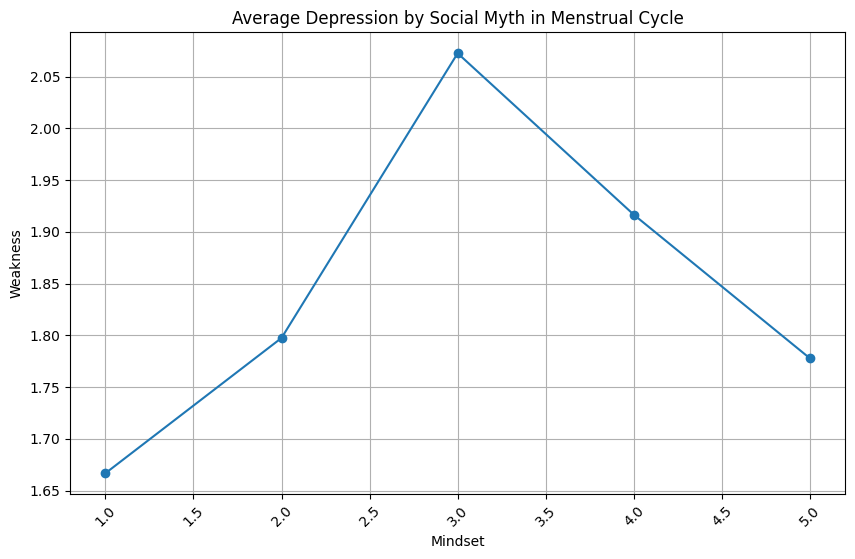

In [ ]:
average_depression = df.groupby("mindset ")["weakness_during_periods "].mean()

# Create a line plot
plt.figure(figsize=(10, 6))
average_depression.plot(marker='o')
plt.title('Average Depression by Social Myth in Menstrual Cycle')
plt.xlabel('Mindset')
plt.ylabel('Weakness')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [ ]:
random.seed(123)

import numpy as np
import random
from collections import deque
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

class DQNAgent:
    def __init__(self, state_size, action_size):
        self.state_size = state_size
        self.action_size = action_size
        self.memory = deque(maxlen=2000)
        self.gamma = 0.95
        self.epsilon = 1.0
        self.epsilon_min = 0.01
        self.epsilon_decay = 0.995
        self.learning_rate = 0.001
        self.model = self._build_model()

    def _build_model(self):
        model = Sequential()
        model.add(Dense(24, input_dim=self.state_size, activation='relu'))
        model.add(Dense(24, activation='relu'))
        model.add(Dense(self.action_size, activation='linear'))
        model.compile(loss='mse', optimizer=Adam(lr=self.learning_rate))
        return model

    def remember(self, state, action, reward, next_state, done):
        self.memory.append((state, action, reward, next_state, done))

    def act(self, state):
        if np.random.rand() <= self.epsilon:
            return random.randrange(self.action_size)
        act_values = self.model.predict(state)
        return np.argmax(act_values[0])

    def replay(self, batch_size):
        minibatch = random.sample(self.memory, batch_size)
        for state, action, reward, next_state, done in minibatch:
            target = reward
            if not done:
                target = (reward + self.gamma *
                          np.amax(self.model.predict(next_state)[0]))
            target_f = self.model.predict(state)
            target_f[0][action] = target
            self.model.fit(state, target_f, epochs=1, verbose=0)
        if self.epsilon > self.epsilon_min:
            self.epsilon *= self.epsilon_decay

    def load(self, name):
        self.model.load_weights(name)

    def save(self, name):
        self.model.save_weights(name)

def main():
    state_size = 3
    action_size = 3
    agent = DQNAgent(state_size, action_size)
    done = False
    batch_size = 32
    for e in range(1):
        state = np.zeros((1, state_size))
        state[0, 0] = input("depression (0-5): ")
        state[0, 1] = input("societal myths (1-5): ")
        state[0, 2] = input("Mindset (1-5): ")

        for time in range(1):
            action = agent.act(state)
            if action == 0:
                print("Educate the person on how to manage their emotions and cope with stress during menstruation, such as through mindfulness exercises and relaxation techniques.")
            elif action == 1:
                print("Encourage open conversations about menstruation to break the taboo.\n Share reliable information and resources on social media platforms.\n Organize workshops or awareness campaigns to challenge societal misconceptions.")
            else:
                print("Seek professional help from therapists or counselors specializing in mental health.\n Engage in regular exercise or physical activities to boost mood.\n Establish a healthy sleep routine for better mental well-being.\nPractice stress-reducing techniques such as deep breathing or journaling.")
            reward = input("Did this suggestion help? (0/1): ")
            reward = int(reward)
            next_state = state
            done = True if time == 99 else False
            agent.remember(state, action, reward, next_state, done)
            state = next_state
            if done:
                print("episode:{}/{}, score: {}".format(e, 1000, time))
                break
        if len(agent.memory) > batch_size:
            agent.replay(batch_size)

    agent.save("dqn_model.h6")

if __name__ == "__main__":
    main()

depression (0-5): 5
societal myths (1-5): 4
Mindset (1-5): 3
Encourage open conversations about menstruation to break the taboo.
 Share reliable information and resources on social media platforms.
 Organize workshops or awareness campaigns to challenge societal misconceptions.
Did this suggestion help? (0/1): 1
